<a href="https://colab.research.google.com/github/tusharbansal22/Tensorflow-Notebooks/blob/main/LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
from tensorflow.keras.layers import LSTM, Input, SimpleRNN, GRU, Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
series= np.sin((0.1*np.arange(400))**2)

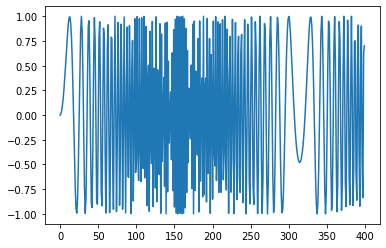

In [6]:
plt.plot(series)
plt.show()

In [10]:
T=10
D=1
X=[]
Y=[]

for t in range(0,len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print("X.shape ",X.shape," Y.shape ",Y.shape)

X.shape  (390, 10)  Y.shape  (390,)


In [11]:
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1))

r=model.fit(X[:-N//2],Y[:-N//2],epochs=80,validation_data=(X[-N//2:],Y[-N//2:]))

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
7/7 [==============================] - 2s 106ms/step - loss: 1.2024 - val_loss: 0.5498
Epoch 2/80
7/7 [==============================] - 0s 21ms/step - loss: 0.5620 - val_loss: 0.7493
Epoch 3/80
7/7 [==============================] - 0s 14ms/step - loss: 0.6340 - val_loss: 0.8770
Epoch 4/80
7/7 [==============================] - 0s 12ms/step - loss: 0.5761 - val_loss: 0.7161
Epoch 5/80
7/7 [==============================] - 0s 13ms/step - loss: 0.5601 - val_loss: 0.6482
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.5376 - val_loss: 0.5911
Epoch 7/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5315 - val_loss: 0.6044
Epoch 8/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5332 - val_loss: 0.6357
Epoch 9/80
7/7 [==============================] - 0s 12ms/step - loss: 0.5278 - val_loss: 0.6120
Epoch 10/80
7/7 [==============================] - 0s 12ms/step - loss: 0.5223 - val_loss: 0.6564
Epoch 11/80
7/7 [===========

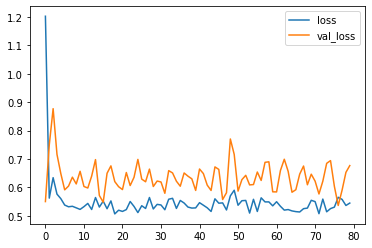

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

13/13 [==============================] - 0s 3ms/step
(390, 1)


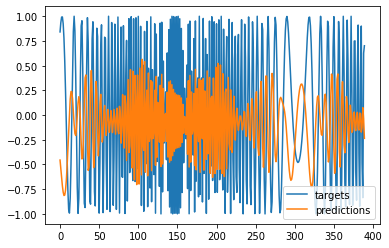

In [13]:
outputs=model.predict(X)
print(outputs.shape)
prediction=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(prediction,label='predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 27ms/step


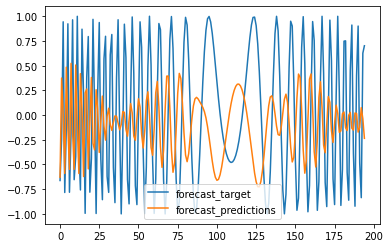

In [15]:
validation_target= Y[-N//2:]
validation_predictions=[]

i=-N//2

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(X[i].reshape(1,-1))[0,0]
  i+=1
  validation_predictions.append(p)

plt.plot(validation_target,label='forecast_target')
plt.plot(validation_predictions,label='forecast_predictions')
plt.legend()

1/1 [==============================] - 0s 36ms/step


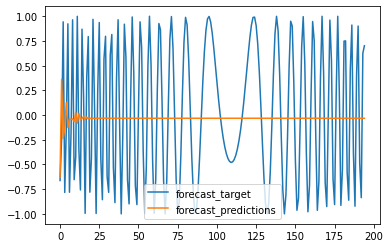

In [16]:
validation_target= Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(last_x.reshape(1,-1))[0,0]
  validation_predictions.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

plt.plot(validation_target,label='forecast_target')
plt.plot(validation_predictions,label='forecast_predictions')
plt.legend()

In [28]:
X=X.reshape(-1,T,1)
i=Input(shape=(T,D))
x=LSTM(10)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.05))
r=model.fit(X[:-N//2],Y[:-N//2],batch_size=32,epochs=200,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 3s 107ms/step - loss: 0.5439 - val_loss: 0.5764
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5258 - val_loss: 0.6187
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5309 - val_loss: 0.5963
Epoch 4/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4782 - val_loss: 0.5170
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4087 - val_loss: 0.4665
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3118 - val_loss: 0.4008
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2149 - val_loss: 0.2750
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2061 - val_loss: 0.2808
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1871 - val_loss: 0.2396
Epoch 10/200
7/7 [==============================] - 0s 14ms/step - loss: 0.1357 - val_loss: 0.2529
Epoch 11/200
7/7 [============

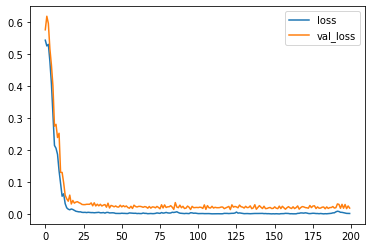

In [29]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 1s 3ms/step
(390, 1)


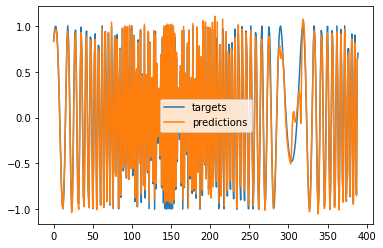

In [30]:
outputs=model.predict(X)
print(outputs.shape)
prediction=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(prediction,label='predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 22ms/step


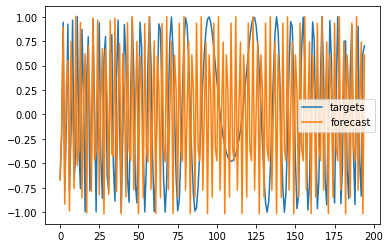

In [31]:
forecast=[]
input_=X[-N//2]
while len(forecast)<len(Y[-N//2:]):
  f=model.predict(input_.reshape(1,T,1))[0,0]
  forecast.append(f)

  input_=np.roll(input_,-1)
  input_[-1]=f

plt.plot(Y[-N//2:],label='targets')
plt.plot(forecast,label='forecast')
plt.legend()
plt.show()